In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy import io
import scipy.io as sio
%matplotlib inline 
import pylab
import csv
from Tkinter import Tk
from tkFileDialog import askopenfilename
from tkFileDialog import askdirectory
import nibabel as nb
from scipy import io
#from nifti import NiftiImage
import nibabel as nb
from scipy.interpolate import interp1d
from scipy import ndimage

# Open data

In [2]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename)

/media/sophie/008C0665790F0763/ComboPanNeuronalGCaMP6/862_863/180315/863ss2onc250_862ss2onc250zx2cregcregc862_863dFF20spsfkf221Smith0_4_60TS.mat


In [3]:
Ua=sio.loadmat(filename)
DT=Ua['TSo']
DT.shape

(5957, 221)

In [4]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename2 = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename2)

/media/sophie/008C0665790F0763/ComboPanNeuronalGCaMP6/862_863/180315/863ss2onc250_862ss2onc250zx2cregcregc862_863dFF20spsfkf221Smith0_4_60IC.nii


In [5]:
img1 = nb.load(filename2)
data = img1.get_data()
S=data.shape
S

(174, 93, 12, 221)

In [6]:
S=data.shape
S

(174, 93, 12, 221)

Z-score

In [7]:
Demean=np.zeros(S)
Dmaps=np.zeros(S)
Dvar=np.zeros(S)
Var=np.zeros(S[3])
D2=np.zeros([S[0],S[1],5,S[3]])
Tvar=np.zeros(S[3])

In [8]:
for i in range(S[3]):
    Demean[:,:,:,i]=data[:,:,:,i]-np.mean(np.mean(np.mean(data[:,:,:,i],0),0),0)

In [9]:
for i in range(S[3]):
    Dsq=np.reshape(Demean[:,:,:,i],S[0]*S[1]*S[2])
    Var[i]=np.sqrt(np.var(Dsq))
    Dvar=Demean[:,:,:,i]/Var[i]
    Dmaps[:,:,:,i]=Dvar-2.5
    Tvar[i]=np.var(DT[i,:])
Dmaps[Dmaps<0]=0

# Open Masks

In [10]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
from Tkinter import Tk
from tkFileDialog import askopenfilename

Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filenameM = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filenameM)
img1 = nb.load(filenameM)
Masks = img1.get_data()
Sm=Masks.shape
Masks=np.array(Masks)

/media/sophie/008C0665790F0763/ComboPanNeuronalGCaMP6/862_863/862_863registration/862ResizedMapsfullpsftrimmed.nii


In [11]:
filenameM='/home/sophie/RegionList'
with open(filenameM) as f:
    content = f.readlines()
Names=[Line.split('\t') for Line in content]
RegionName=[Names[i][0] for i in range(75)]
Num=[int(Names[i][2]) for i in range(75)]

# Average in masks to sort components by brain region

In [12]:
Dmaps.shape

(174, 93, 12, 221)

In [13]:
M=np.zeros((S[3],86))
Mapmean=np.zeros(S[3])
MMasks=np.zeros(86)

In [14]:
for i in range(S[3]):
    Mapmean[i]=np.mean(np.mean(np.mean(Dmaps[:,:,:,i])))
    for j in range(86):
        MMasks[j]=np.mean(np.mean(np.mean(Masks[:,:,:,j])))
        if MMasks[j]:
            M[i,j]=np.mean(np.mean(np.mean(Masks[:,:,:,j]*Dmaps[:,:,:,i])))/(MMasks[j]*Mapmean[i])

In [15]:
CompMainName=S[3]*['']
CompNameAdd=np.zeros((S[3],86))
for i in range(S[3]):
    Max=np.max(M[i,:])
    I=np.argmax(M[i,:])+1
    for j in range(86):
        J=[l for l in range(74) if Num[l]==(j+1)]
        if M[i,j]>0.2*Max:
            CompNameAdd[i,J]=1
    J=[l for l in range(74) if Num[l]==I]
    if J!= []:
        CompMainName[i]=Names[np.array(J)][0]

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:12: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


In [16]:
J

[69]

LO_R
LOP_R
29
LO_R
LOP_R
38
LO_R
LOP_R
85
LO_R
LOP_R
ME_R
101
LO_R
128
LO_R
131
LO_R
BU_R
ME_R
166
lobula


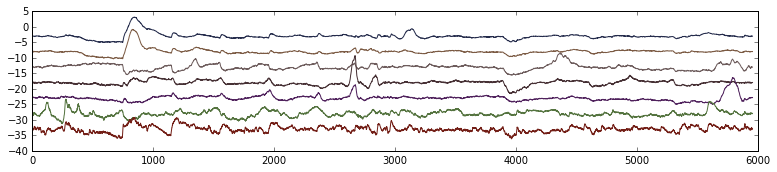

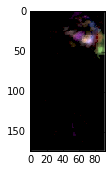

BU_R
BU_L
ME_L
34
BU_R
ATL_R
ME_L
157
BU_R
178
bulb


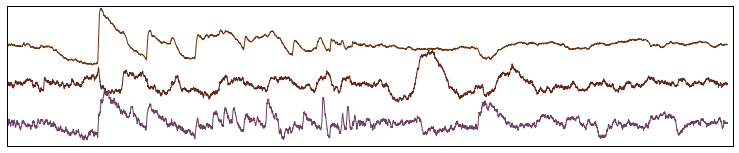

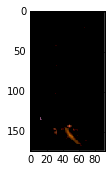

PB
ATL_L
43
PB
ATL_L
49
PB
ATL_R
80
PB
ATL_L
103
protocerebral bridge


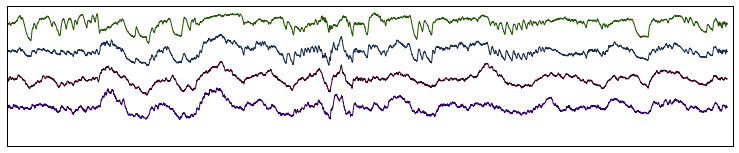

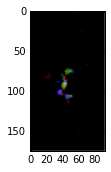

LH_R
MB_CA_R
0
LH_R
GA_R
3
LH_R
6
LH_R
MB_CA_R
42
LH_R
PLP_R
50
LH_R
118
lateral horn


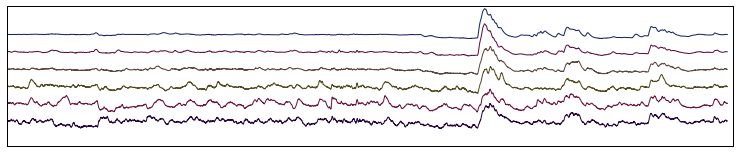

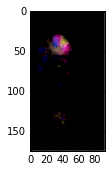

AMMC_R
13
SAD
AMMC_R
IVLP_R
IPS_R
31
antennal mechanosensory and motor center


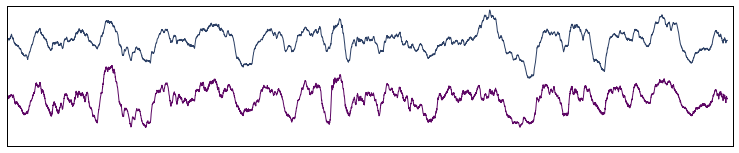

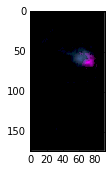

PB
ATL_R
46
IB_R
ATL_R
SMP_R
SMP_L
116
ATL_R
ME_L
133
antler


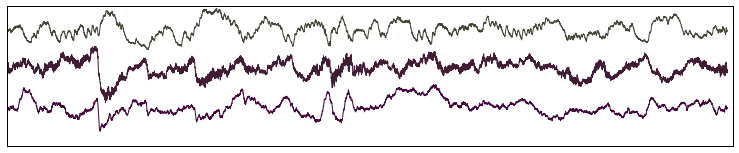

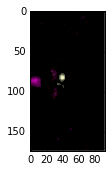

MB_PED_R
MB_VL_R
68
vertical lobe of adult mushroom body


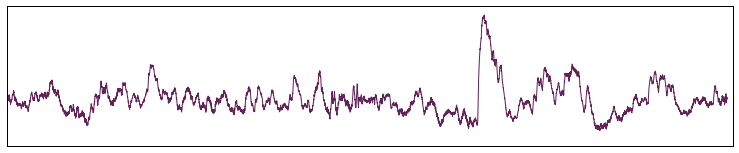

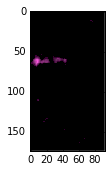

CRE_R
MB_PED_R
MB_ML_R
9
MB_VL_R
MB_ML_R
SIP_R
10
CRE_R
MB_ML_R
MB_ML_L
120
medial lobe of adult mushroom body


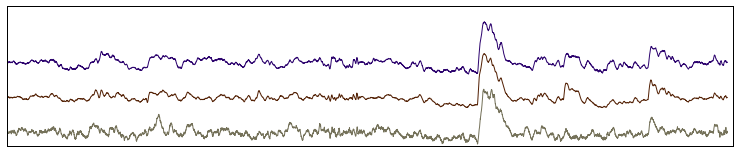

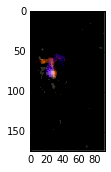

LOP_R
ME_R
44
AME_R
LO_R
LOP_R
137
lobula plate


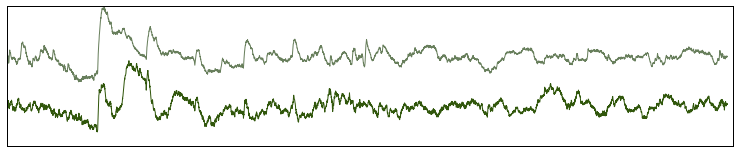

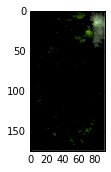

EB
123
EB
136
EB
162
ellipsoid body


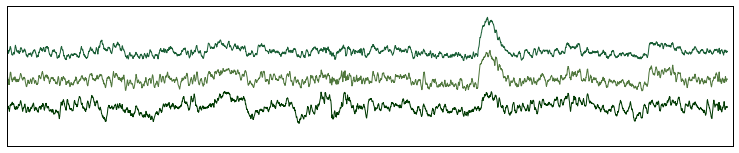

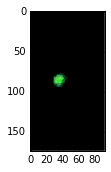

AL_R
AL_L
14
LAL_R
AL_R
AL_L
18
LAL_R
AL_R
MB_CA_R
GA_R
26
LAL_R
AL_R
AVLP_R
61
LAL_R
AL_R
79
VES_R
AL_R
82
LAL_R
AL_R
165
adult antennal lobe


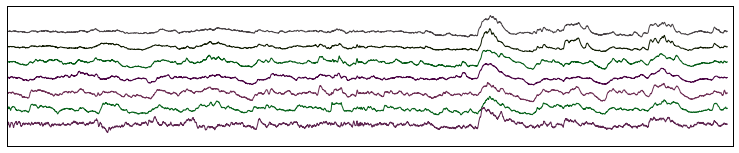

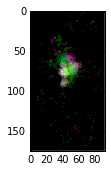

ME_R
15
ME_R
17
ME_R
23
ME_R
41
LO_R
LOP_R
ME_R
59
ME_R
BU_L
63
ME_R
66
ME_R
SPS_R
ME_L
SPS_L
67
LO_R
ME_R
70
BU_R
LOP_R
ME_R
72
LO_R
LOP_R
ME_R
73
ME_R
78
LO_R
LOP_R
ME_R
88
LO_R
ME_R
113
LO_R
ME_R
121
LO_R
ME_R
124
ME_R
159
ME_R
GA_R
SIP_L
164
medulla


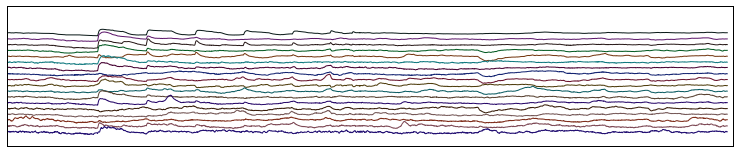

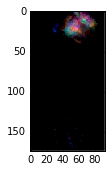

EB
FB
11
EB
FB
27
EB
FB
69
EB
FB
BU_L
119
fan-shaped body


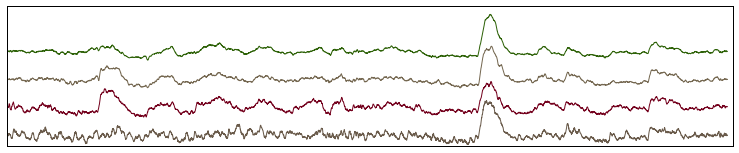

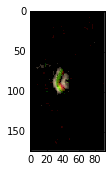

SLP_R
SMP_R
207
superior lateral protocerebrum


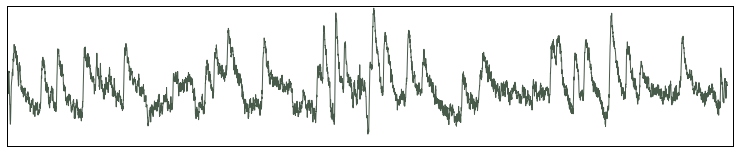

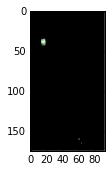

MB_VL_R
SMP_R
22
SMP_R
150
superior medial protocerebrum


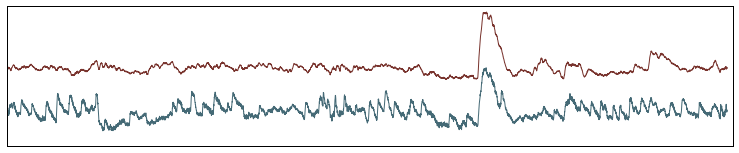

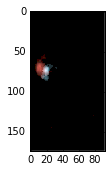

IVLP_R
PLP_R
IPS_R
104
wedge


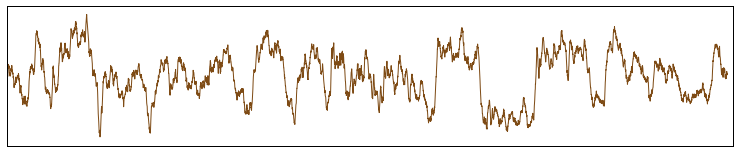

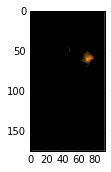

PLP_R
84
posterior lateral protocerebrum


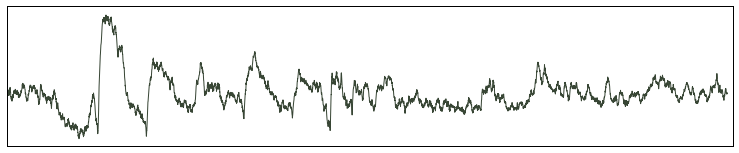

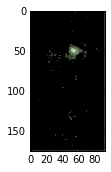

MB_CA_R
2
MB_PED_R
MB_VL_R
MB_CA_R
56
MB_CA_R
75
MB_CA_R
139
LH_R
MB_CA_R
GA_R
193
calyx of adult mushroom body


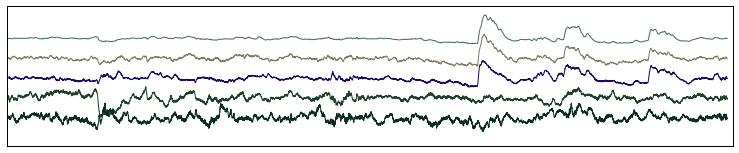

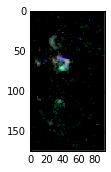

IB_R
SPS_R
16
superior posterior slope


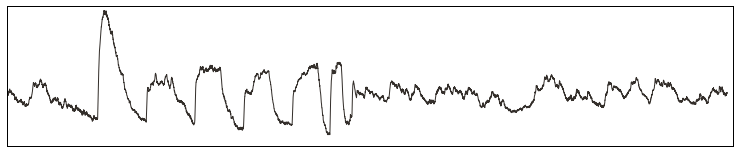

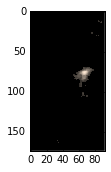

IPS_R
LO_L
LOP_L
4
SPS_R
IPS_R
IPS_L
58
inferior posterior slope


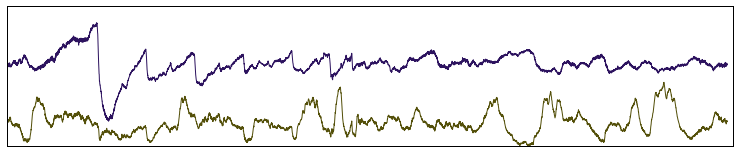

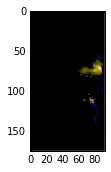

GNG
LO_L
LOP_L
35
adult gnathal ganglion


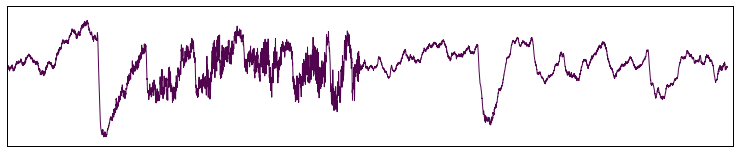

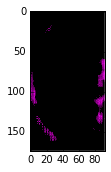

FLA_R
ME_R
GA_R
161
gall


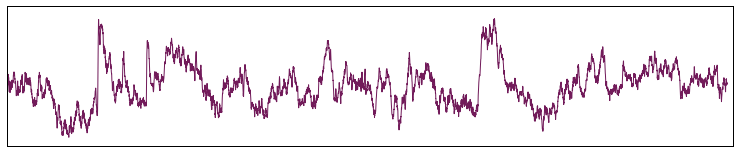

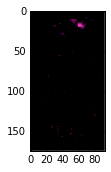

LO_L
ME_L
60
LO_L
87
LO_L
ME_L
89
LO_L
LOP_L
ME_L
93
LO_L
96
LO_L
LOP_L
ME_L
111
LO_L
ME_L
149
LO_L
208
lobula


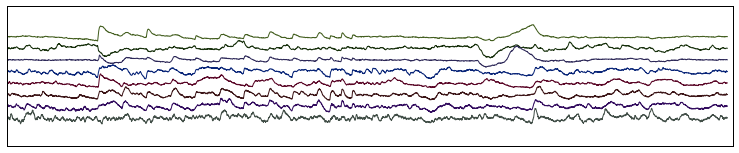

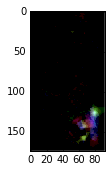

LH_L
53
PB
LH_L
105
LH_L
AL_L
180
lateral horn


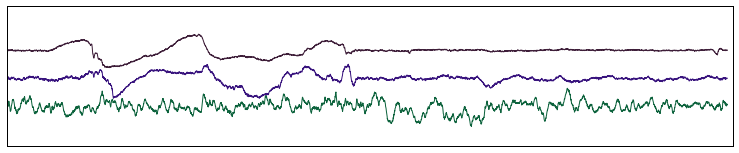

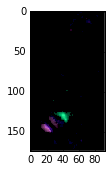

AMMC_L
12
antennal mechanosensory and motor center


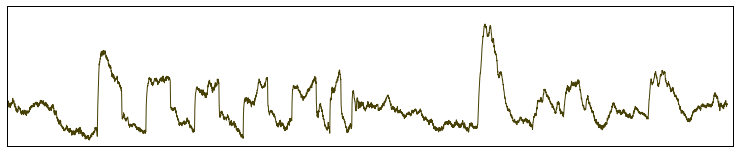

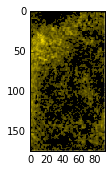

IB_R
IB_L
33
inferior bridge


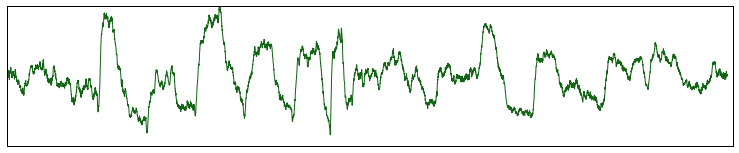

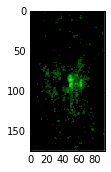

PB
ATL_L
156
PB
ATL_R
ATL_L
160
antler


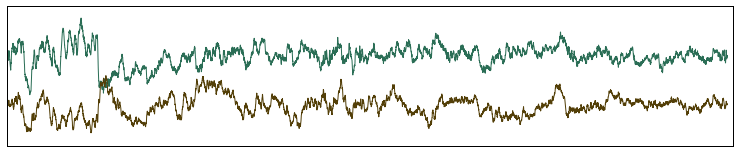

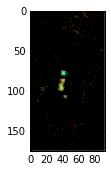

MB_VL_L
21
MB_PED_L
MB_VL_L
MB_ML_L
141
vertical lobe of adult mushroom body


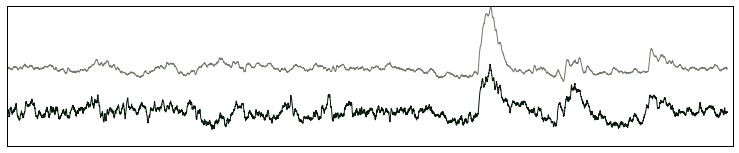

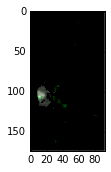

CRE_L
MB_PED_L
MB_ML_L
7
MB_VL_L
MB_ML_L
SIP_L
AOTU_L
19
MB_ML_L
97
MB_VL_L
MB_ML_L
144
medial lobe of adult mushroom body


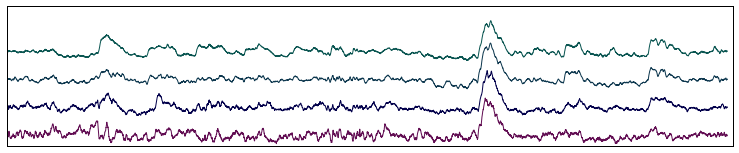

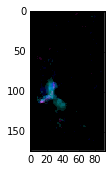

LO_L
LOP_L
ME_L
92
lobula plate


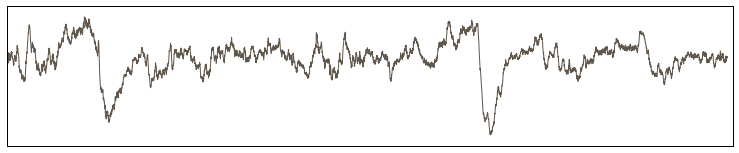

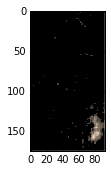

LAL_L
AL_L
25
CRE_R
AL_R
GA_R
AL_L
39
VES_L
AL_L
71
adult antennal lobe


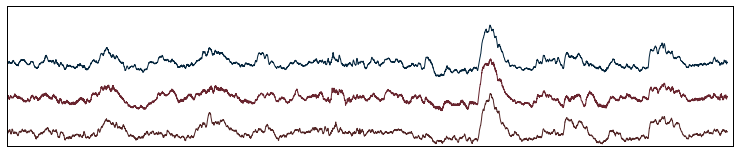

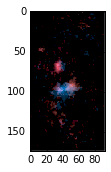

ME_L
45
BU_R
ME_L
47
ME_L
52
LO_L
ME_L
54
LO_L
LOP_L
ME_L
57
LO_L
ME_L
65
ME_L
90
LO_L
ME_L
91
LO_L
ME_L
100
LO_R
FLA_R
LO_L
ME_L
102
ME_L
107
BU_R
LO_L
ME_L
112
LO_L
ME_L
114
ME_L
122
LO_L
ME_L
126
LO_L
ME_L
134
ME_L
138
ME_L
140
ATL_L
ME_L
142
LO_L
ME_L
152
ME_L
153
ME_L
154
ME_L
171
NO
LO_L
ME_L
182
PB
LO_L
ME_L
187
medulla


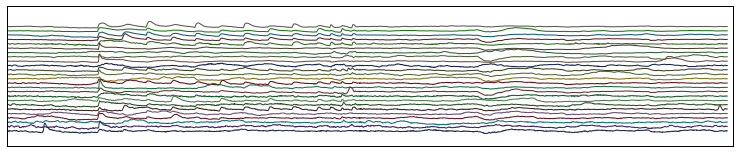

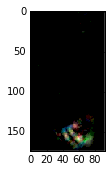

SMP_L
76
SMP_L
95
PB
MB_VL_L
SIP_L
SMP_L
186
superior medial protocerebrum


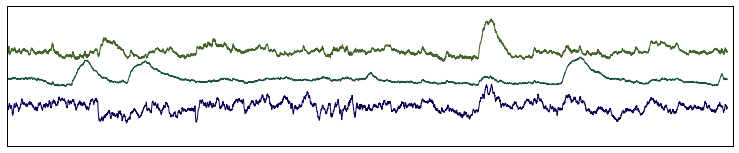

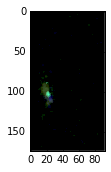

AVLP_L
PVLP_L
106
anterior ventrolateral protocerebrum


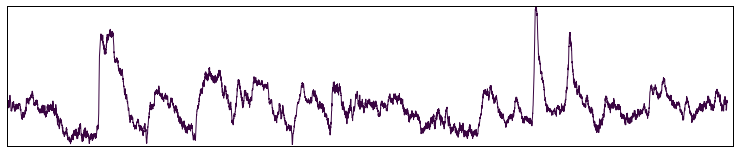

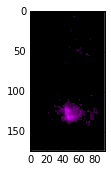

IVLP_L
74
wedge


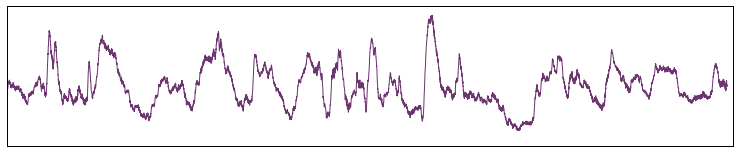

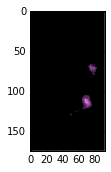

MB_CA_L
148
calyx of adult mushroom body


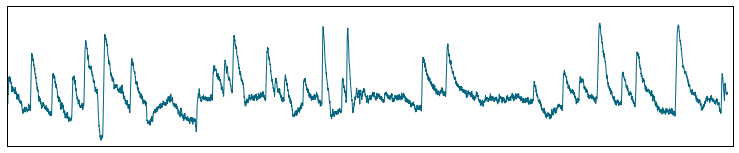

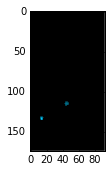

SPS_L
40
superior posterior slope


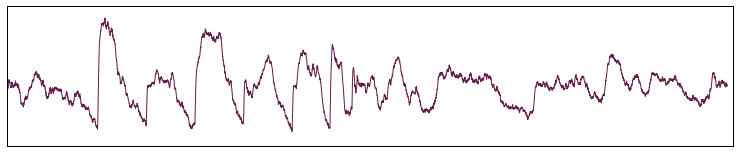

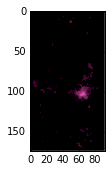

IPS_L
36
BU_L
IPS_L
115
inferior posterior slope


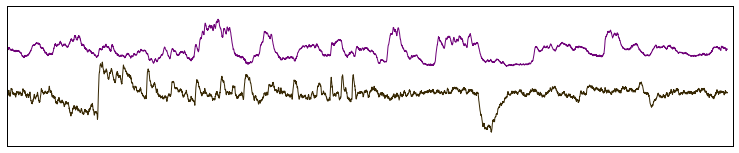

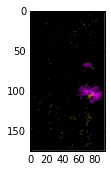

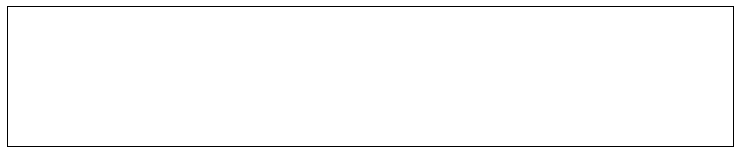

In [17]:
pylab.rcParams['figure.figsize'] = (13, 2.5)

h=5
tot=0
GoodICAnat=np.zeros(S[3])

for l in range(74):
    Final_maps=np.zeros((S[0],S[1],3))
    Fmap=np.zeros((S[0],S[1],3))
    C=np.zeros(3)

    n=0
    for i in range(len(CompMainName)):                    
        Dmmv=np.mean(data[:,:,:,i],2) 
        Dmmv[Dmmv<0.2*np.max(np.max(np.max(Dmmv)))]=0
        C=np.squeeze(np.random.rand(3,1))
        labeled, nrobject=ndimage.label(Dmmv>0)
        
        if CompMainName[i]==Names[l][0] and (sum(CompNameAdd[i,:])<5) and nrobject<200:
            n=n+1            
            
            for k in range(3):
                Fmap[:,:,k]=0.7*Dmmv*C[k]/np.max(C)
            Final_maps=Final_maps+Fmap
            #plt.plot(Time_fluoICA.T,(DT[:,i]/np.sqrt(np.var(DT[:,i]))-h*n+2),color=C/2)
            plt.plot((DT[:,i]/np.sqrt(np.var(DT[:,i]))-h*n+2),color=C/2)
            tot=tot+1
            GoodICAnat[i]=1
            #print(i)
            for j in range(86):
                if CompNameAdd[i,j]==1:                
                    print(Names[np.array(j)][0])
            print(i)
            
                    
    if n!=0:
        print(Names[l][1])

        plt.show()
        FM=Final_maps/np.max(np.max(Final_maps))
        FM[FM<0.1]=0
        plt.imshow(FM,interpolation='none')
        plt.show()
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)
        


##### Looked at the components maps and time series and remove all the components which are localized on the edge of the brain and with activity unlike GCaMP6 transients.


In [18]:
BadICs=[35,12,92]

In [19]:
for idx in BadICs:
    GoodICAnat[idx] = 0.0

# Reorder by larger sub-regions (~ presumed stimulus to motor)

In [20]:
LargerRegionsDic={'':'','AME_R':'OL','LO_R':'OL','NO':'CX','BU_R':'CX','PB':'CX','LH_R':'LH','LAL_R':'LX','SAD':'PENP'
               ,'CAN_R':'PENP','AMMC_R':'PENP','ICL_R':'INP','VES_R':'VMNP','IB_R':'INP','ATL_R':'INP','CRE_R':'INP'
               ,'MB_PED_R':'MB','MB_VL_R':'MB','MB_ML_R':'MB','FLA_R':'PENP','LOP_R':'OL','EB':'CX','AL_R':'AL',
                'ME_R':'OL','FB':'CX','SLP_R':'SNP','SIP_R':'SNP','SMP_R':'SNP','AVLP_R':'VLNP','PVLP_R':'VLNP',
                'IVLP_R':'VLNP','PLP_R':'VLNP','AOTU_R':'VLNP','GOR_R':'VMNP','MB_CA_R':'MB','SPS_R':'VMNP',
                'IPS_R':'VMNP','SCL_R':'INP','EPA_R':'VMNP','GNG':'GNG','PRW':'PENP','GA_R':'LX','AME_L':'OL'
                ,'LO_L':'OL','BU_L':'CX','LH_L':'LH','LAL_L':'LX','CAN_L':'PENP','AMMC_L':'PENP','ICL_L':'INP',
                'VES_L':'VMNP','IB_L':'INP','ATL_L':'INP','CRE_L':'INP','MB_PED_L':'MB','MB_VL_L':'MB',
                'MB_ML_L':'MB','FLA_L':'PENP','LOP_L':'OL','AL_L':'AL','ME_L':'OL','SLP_L':'SNP','SIP_L':'SNP',
                'SMP_L':'SNP','AVLP_L':'VLNP','PVLP_L':'VLNP','IVLP_L':'VLNP','PLP_L':'VLNP','AOTU_L':'VLNP',
                'GOR_L':'VMNP','MB_CA_L':'MB','SPS_L':'VMNP','IPS_L':'VMNP','SCL_L':'INP','EPA_L':'VMNP','GA_L':'LX'}

SmallRegionsSorted=['ME_L','ME_R','LO_R','LO_L','LOP_R','LOP_L','AME_R','AME_L',
                  'PLP_R','PLP_L','PVLP_R','PVLP_L','AVLP_R','AVLP_L','AOTU_R','AOTU_L','IVLP_R','IVLP_L',
                  'AL_R','AL_L',
                  'MB_CA_R','MB_CA_L','MB_PED_R','MB_PED_L','MB_VL_R','MB_VL_L','MB_ML_R','MB_ML_L',
                  'SMP_R','SMP_L','SIP_R','SLP_L','SLP_R','SIP_L',
                  'LH_R','LH_L',                  
                  'CRE_R','CRE_L','ICL_R','ICL_L','SCL_R','SCL_L','IB_R','IB_L','ATL_R','ATL_L',
                  'EB','PB','NO','FB',
                  'BU_R','BU_L','LAL_R','LAL_L','GA_R','GA_L',
                  'GOR_R','GOR_L','EPA_R','EPA_L','VES_R','VES_L','SPS_R','SPS_L','IPS_R','IPS_L',
                  'AMMC_R','AMMC_L','SAD','FLA_R','FLA_L','PRW','CAN_R','CAN_L',
                  'GNG','']

Tozip=range(len(SmallRegionsSorted))
SmallRegionsDic=dict(zip(SmallRegionsSorted,Tozip))

LargerRegion=[LargerRegionsDic[CompMainName[i]] for i in range(S[3])]

LargerRegionInd={ 'OL':1,'VLNP':2,'VMNP':3,'AL':4,'MB':5,'LH':6,'SNP':7,'CX':8,'LX':9,'INP':10,'PENP':11,'GNG':12,'':13}

LargerRegionI=np.array([LargerRegionInd[LargerRegion[i]] for i in range(S[3])])

SmallRegion=np.array([SmallRegionsDic[CompMainName[i]] for i in range(S[3])])

NewOrder=np.argsort(SmallRegion)

SmallRegion[NewOrder]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  4,  4,  4,  4,  4,  5,  6,  6,  6,  8,  8,  9, 13, 13, 16, 16,
       17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 21, 21, 21, 21, 21, 21, 23, 24, 24, 24, 25, 25, 25, 25,
       26, 26, 26, 27, 27, 27, 27, 27, 27, 28, 28, 29, 29, 29, 32, 32, 32,
       33, 34, 34, 34, 34, 34, 34, 34, 34, 35, 35, 35, 35, 41, 43, 43, 44,
       44, 44, 44, 44, 44, 44, 45, 45, 45, 45, 45, 45, 45, 46, 46, 46, 46,
       47, 47, 47, 47, 47, 47, 47, 48, 48, 49, 49, 49, 49, 50, 50, 50, 50,
       50, 50, 50, 50, 50, 51, 51, 51, 51, 54, 54, 54, 54, 58, 62, 62, 63,
       64, 64, 65, 65, 66, 66, 66, 66, 67, 69, 70, 71, 72, 72, 73, 74, 75])

In [21]:
LargerRegionIndToName = {v: k for k, v in LargerRegionInd.iteritems()}

In [22]:
LargerRegionI

array([ 6,  5,  5,  6,  3,  5,  6,  5,  7,  5,  5,  8, 11, 11,  4,  1,  3,
        1,  4,  5, 11,  5,  7,  1,  1,  4,  4,  8, 10,  1,  1, 11, 10, 10,
        8, 12,  3,  2,  1,  4,  3,  1,  6,  8,  1,  1, 10,  1,  1,  8,  6,
       10,  1,  6,  1,  5,  5,  1,  3,  1,  1,  4,  8,  1,  2,  1,  1,  1,
        5,  8,  1,  4,  1,  1,  2,  5,  7, 13,  1,  4,  8,  8,  4,  8,  2,
        1,  9,  1,  1,  1,  1,  1,  1,  1,  8,  7,  1,  5, 11,  6,  1,  1,
        1,  8,  2,  6,  2,  1, 10,  5, 10,  1,  1,  1,  1,  3, 10,  1,  6,
        8,  5,  1,  1,  8,  1,  8,  1,  8,  1,  5,  5,  1,  1, 10,  1,  5,
        8,  1,  1,  5,  1,  5,  1,  7,  5,  1, 11,  5,  5,  1,  7,  3,  1,
        1,  1,  5, 10,  8,  1,  1, 10,  9,  8,  1,  1,  4,  1,  8,  8,  1,
        2,  1,  8, 10, 11,  5,  5, 11,  8,  1,  6,  9,  1,  1,  2,  7,  7,
        1,  8,  8, 10, 11, 10,  5,  5, 11,  5,  4,  1, 10,  1,  1, 11, 10,
        1,  4,  1,  7,  1,  9, 10,  6,  8,  8,  1,  3,  6,  8,  8,  8,  5])

In [23]:
GoodICAnat

array([ 1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,
        1.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,
        1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,
        1.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,
        1.,  0.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,
        0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,
        0.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        0.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,
        1.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1

OL
15
17
23
29
38
41
44
45
47
52
54
57
59
60
63
65
66
67
70
72
73
78
85
87
88
89
90
91
93
96
100
101
102
107
111
112
113
114
121
122
124
126
128
131
134
137
138
140
142
149
152
153
154
159
164
166
171
182
187
208


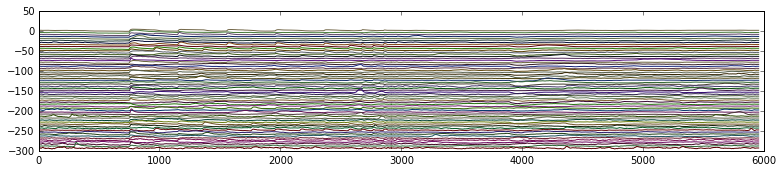

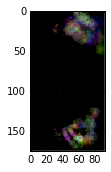

VLNP
74
84
104
106


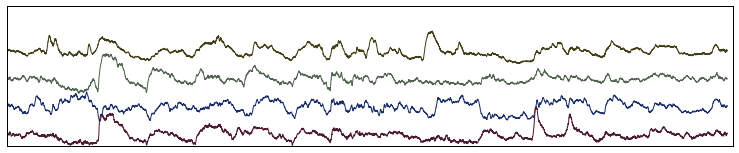

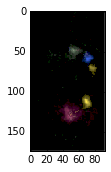

VMNP
4
16
36
40
58
115


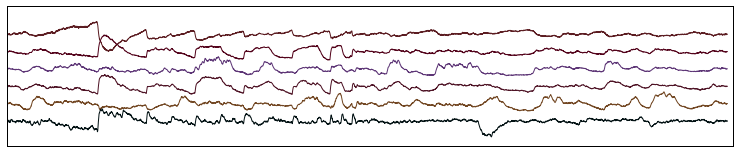

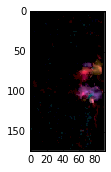

AL
14
18
25
26
39
61
71
79
82
165


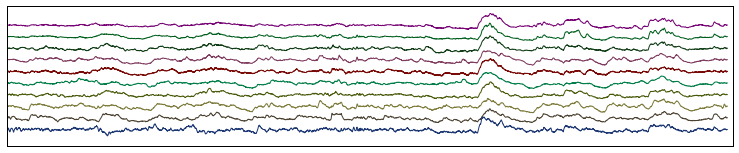

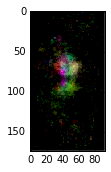

MB
2
7
9
10
19
21
56
68
75
97
120
139
141
144
148
193


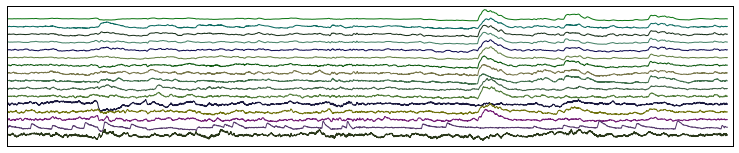

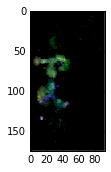

LH
0
3
6
42
50
53
105
118
180


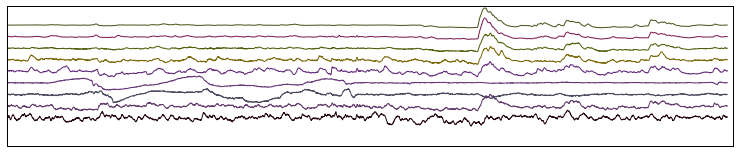

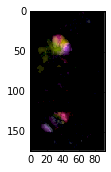

SNP
22
76
95
150
186
207


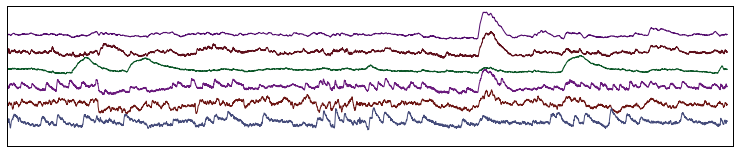

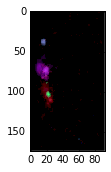

CX
11
27
34
43
49
69
80
103
119
123
136
157
162
178


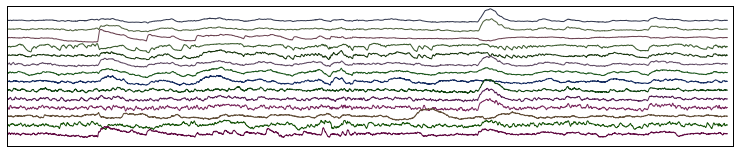

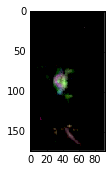

LX
161


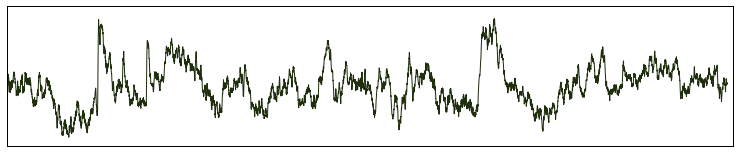

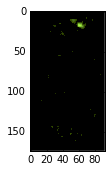

INP
33
46
116
133
156
160


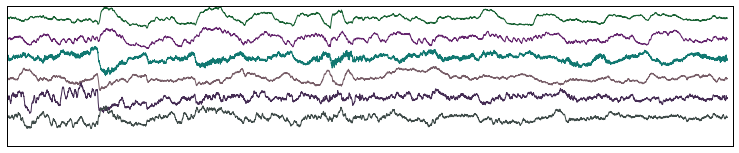

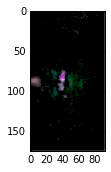

PENP
13
31


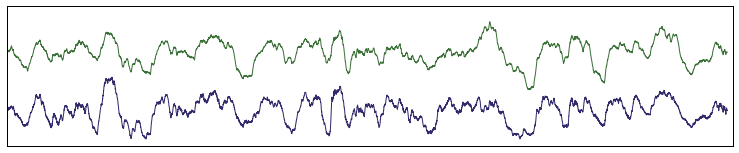

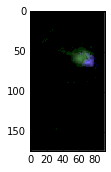

GNG


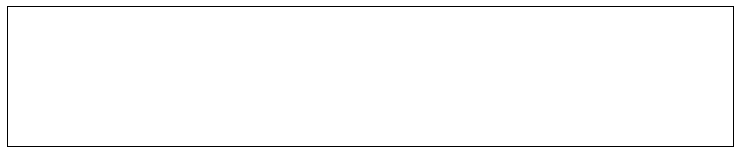

In [24]:
pylab.rcParams['figure.figsize'] = (13, 2.5)

h=5
tot=0
NumberInLargeRegion=np.zeros(13)

for l in range(1,13):
    print(LargerRegionIndToName[l])
    Final_maps=np.zeros((S[0],S[1],3))
    Fmap=np.zeros((S[0],S[1],3))
    C=np.zeros(3)

    n=0
    for i in range(len(CompMainName)):                    
        Dmmv=np.mean(data[:,:,:,i],2) 
        Dmmv[Dmmv<0.2*np.max(np.max(np.max(Dmmv)))]=0
        C=np.squeeze(np.random.rand(3,1))
        labeled, nrobject=ndimage.label(Dmmv>0)
        
        if LargerRegionI[i]==l:          
            if GoodICAnat[i]==1:
                for k in range(3):
                    Fmap[:,:,k]=0.7*Dmmv*C[k]/np.max(C)
                Final_maps=Final_maps+Fmap
                #plt.plot(Time_fluoICA.T,(DT[:,i]/np.sqrt(np.var(DT[:,i]))-h*n+2),color=C/2)
                plt.plot((DT[:,i]/np.sqrt(np.var(DT[:,i]))-h*n+2),color=C/2)
                tot=tot+1
                print(i)
                n=n+1 
                    
    if n!=0:

        plt.show()
        FM=Final_maps/np.max(np.max(Final_maps))
        FM[FM<0.1]=0
        plt.imshow(FM,interpolation='none')
        plt.show()
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)
        
    NumberInLargeRegion[l]=n

In [25]:
# Output number of component per region
np.savetxt('/'.join(filename.split('/')[:-1])+'/NumberInLargeRegions.txt',NumberInLargeRegion)